In [29]:
library(AER)
library(car)
library(sandwich)
library(lmtest)
library(gmm)
library(systemfit)
library(ggplot2)
library(repr)
options(repr.plot.width=10)

In [30]:
corr_IS <-read.table("Exemple_I_S.csv",head=TRUE,sep=";" )
head(corr_IS)
summary(corr_IS)

Country,S_GDP,I_GDP,S_GDP1,I_GDP1,S_GDP2,I_GDP2,OECD,GDP
Antigua and Barbuda,16.67272,29.32876,17.85315,29.33944,15.492295,29.31809,0,18743.627
Argentina,17.08426,18.09456,16.60575,18.80399,17.562770,17.38514,0,15467.272
"Bahamas, The",20.35409,24.96474,21.68756,23.57176,19.099049,26.27578,0,23820.081
Bahrain,27.68545,26.09833,28.54594,28.49550,26.824958,23.70116,0,42716.873
Bangladesh,25.02284,21.10992,17.59783,16.95306,32.447863,25.26678,0,1841.247
Barbados,13.27491,15.32776,18.22432,13.99612,8.325512,16.65940,0,14175.750


                Country       S_GDP            I_GDP           S_GDP1      
 Antigua and Barbuda: 1   Min.   : 4.143   Min.   :11.76   Min.   : 0.265  
 Argentina          : 1   1st Qu.:15.120   1st Qu.:19.04   1st Qu.:16.380  
 Bahamas, The       : 1   Median :20.122   Median :22.32   Median :19.832  
 Bahrain            : 1   Mean   :20.266   Mean   :22.72   Mean   :19.504  
 Bangladesh         : 1   3rd Qu.:23.308   3rd Qu.:25.27   3rd Qu.:23.787  
 Barbados           : 1   Max.   :44.387   Max.   :37.23   Max.   :42.315  
 (Other)            :75                                                    
     I_GDP1          S_GDP2           I_GDP2            OECD       
 Min.   :11.00   Min.   : 2.938   Min.   : 9.982   Min.   :0.0000  
 1st Qu.:19.59   1st Qu.:15.141   1st Qu.:19.376   1st Qu.:0.0000  
 Median :22.32   Median :19.644   Median :22.359   Median :0.0000  
 Mean   :22.56   Mean   :21.025   Mean   :22.870   Mean   :0.2593  
 3rd Qu.:26.29   3rd Qu.:26.825   3rd Qu.:25.387   3

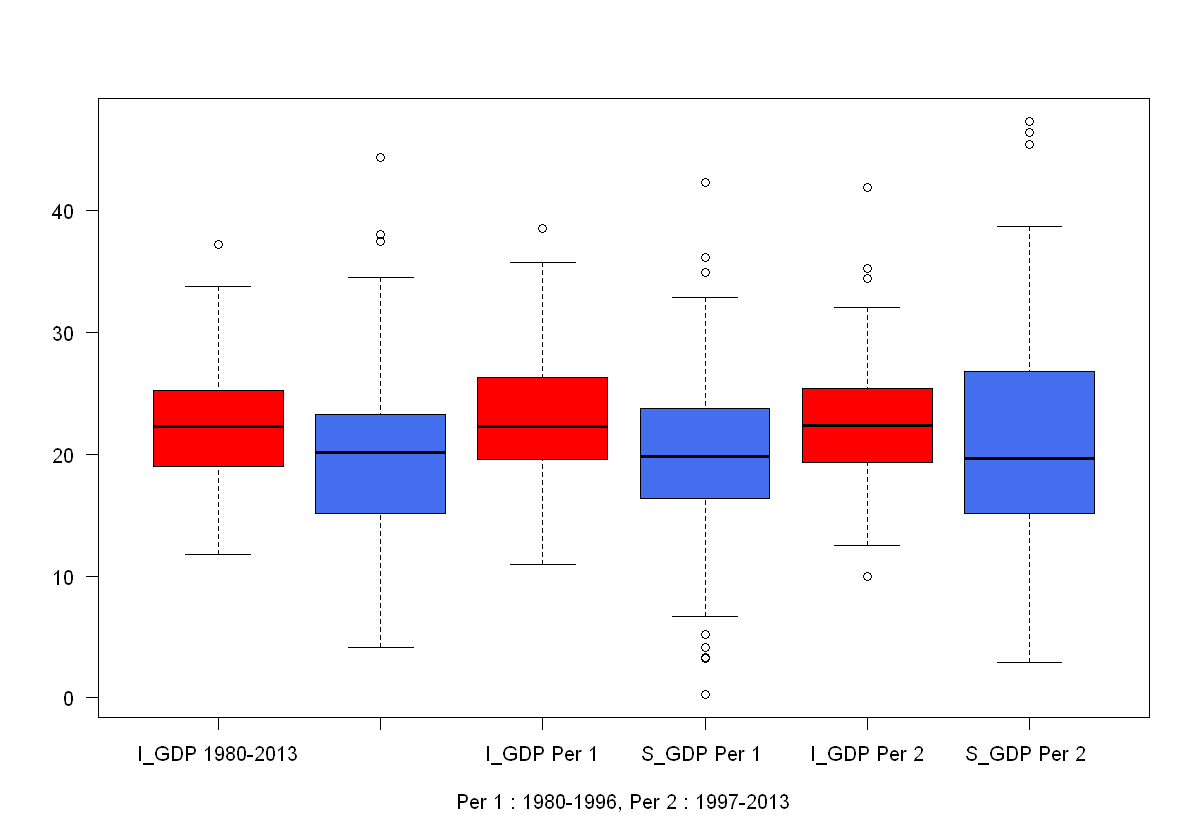

In [31]:
boxplot(corr_IS$I_GDP, corr_IS$S_GDP, corr_IS$I_GDP1, corr_IS$S_GDP1, corr_IS$I_GDP2, 
    corr_IS$S_GDP2, las = 1, names = c("I_GDP 1980-2013", "S_GDP 1980-2013", "I_GDP Per 1", 
        "S_GDP Per 1 ", "I_GDP Per 2", "S_GDP Per 2 "), col = c("red", "royalblue2", 
        "red", "royalblue2", "red", "royalblue2"))
## las = 1 légende horizontale, las = 2 légende verticale
mtext("Per 1 : 1980-1996, Per 2 : 1997-2013", side = 1, line = 3)

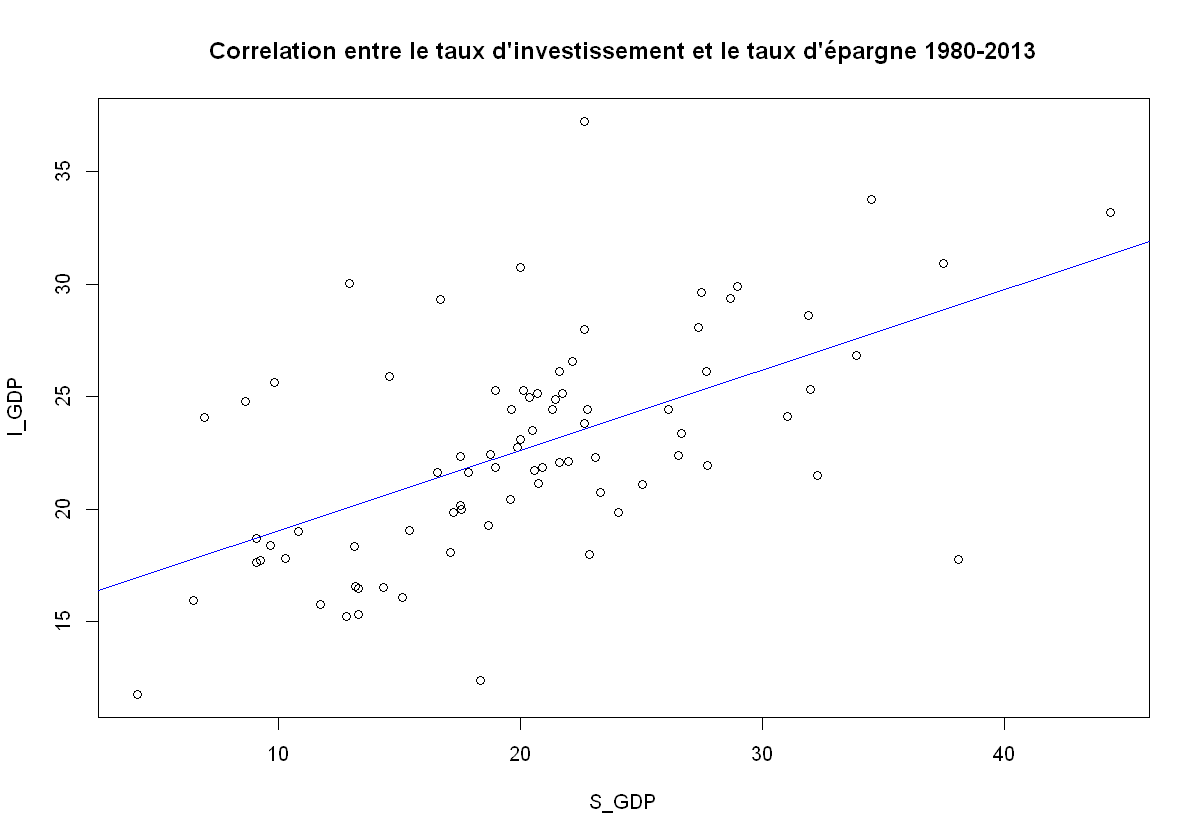

In [32]:
plot(I_GDP~S_GDP, data=corr_IS, main="Correlation entre le taux d'investissement et le taux d'épargne 1980-2013" )
abline((lm(corr_IS$I_GDP~corr_IS$S_GDP)$coefficients), col="blue")

##### Estimation MCO

In [33]:
cor(corr_IS$I_GDP,corr_IS$S_GDP)
cor(corr_IS$I_GDP,corr_IS$S_GDP)^2

[1] 0.5642109

[1] 0.318334

In [34]:
Periode_G <- lm( I_GDP ~ S_GDP, data=corr_IS)
summary(Periode_G)


Call:
lm(formula = I_GDP ~ S_GDP, data = corr_IS)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.3044  -2.0165  -0.4147   2.0558  13.6752 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  15.5020     1.2709  12.198  < 2e-16 ***
S_GDP         0.3560     0.0586   6.074 4.13e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.07 on 79 degrees of freedom
Multiple R-squared:  0.3183,	Adjusted R-squared:  0.3097 
F-statistic: 36.89 on 1 and 79 DF,  p-value: 4.126e-08


In [35]:
coef(Periode_G)

(Intercept)       S_GDP 
 15.5020426   0.3559597

**Test individuel de Student:**

- Dans les coefficients, la p-value de S_GDP est égale à 4.13e-08 qui est largement inférieur à 0.05, donc l'épargne (S_GDP) est significative dans le modèle.
- Comme n>30, la loi de Student tend vers un loi Normale. La t-value de S_GDP est égale à 6.074 > 1.96, donc le coefficient est significatif.


**Test global:**

- Les coefficients permetent d'expliquer 31.83% de la variation de l'investissement.
- Le modèle est globalement satisfaisant, avec une p-value de 4.126e-08 largement inférieur à 0.05

**Conclusion**
Si l'épargne augmente de 1 point de pourcentage, alors l'investissement augmente de $\beta_2$ = 0.3560.

In [36]:
fitted(Periode_G)[1:5]

1        2        3        4        5 
21.43686 21.58335 22.74728 25.35695 24.40917

In [37]:
residuals(Periode_G)[1:5]

1          2          3          4          5 
 7.8919017 -3.4887888  2.2174654  0.7413866 -3.2992485

In [38]:
scrc <- sum(Periode_G$residuals^2)
scrc

[1] 1308.908

### Test mobilite des capitaux
On effectue un test de Student:
$$
\left\{
    \begin{array}{ll}
        H_0 = 1 \\
        H_1 \ne 1
    \end{array}
\right.
$$

In [39]:
linearHypothesis(Periode_G, "S_GDP = 1")

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
80,3309.897,NA,NA,NA,NA
79,1308.908,1,2000.989,120.771,1.389421e-17


#### Estimation avec une spécificité OCDE

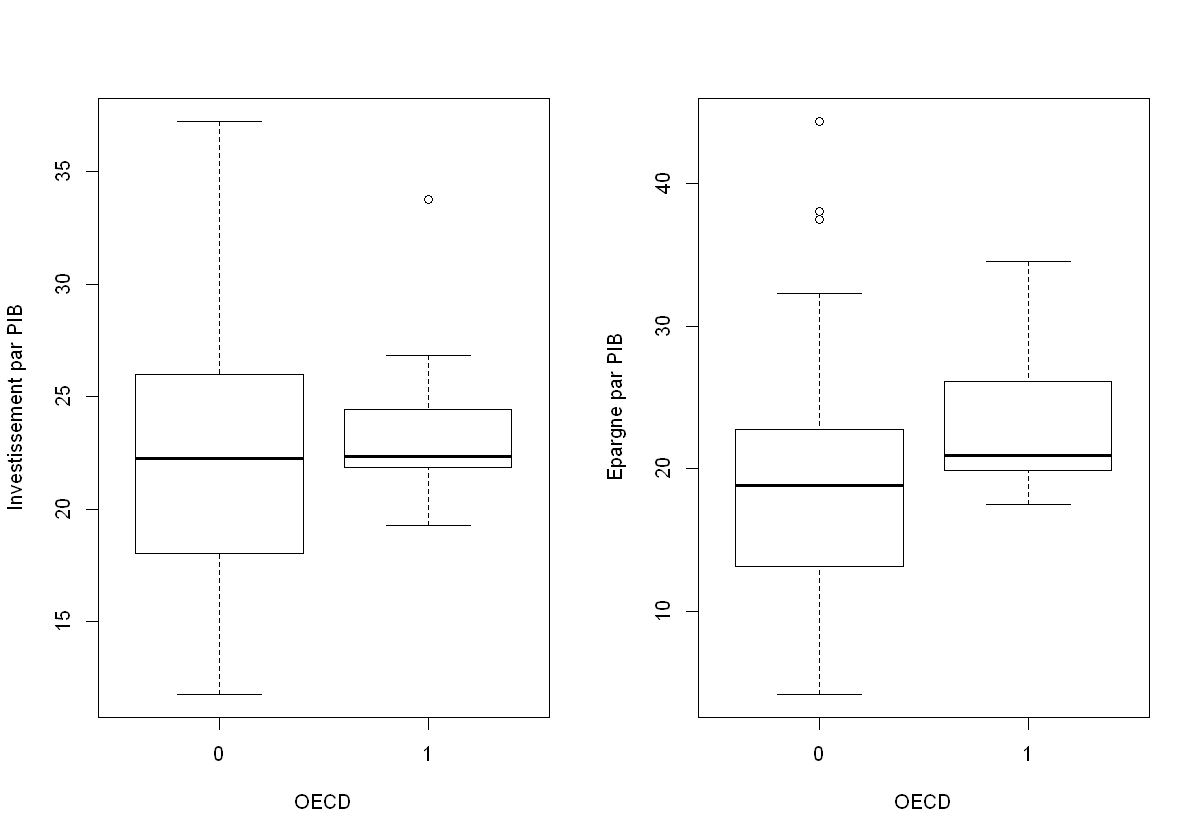

In [40]:
par(mfrow = c(1,2))
boxplot(I_GDP ~ OECD,
        data = corr_IS,
        ylab = "Investissement par PIB"
       )
boxplot(S_GDP ~ OECD,
        data = corr_IS,
        ylab = "Epargne par PIB"
       )

##### Ajout des informations sur l'OCDE
On ajoute les variables sur l'OCDE dans les variables explicatives pour tester un nouveau modèle

In [41]:
S_GDP_OECD = corr_IS[,"S_GDP"]*corr_IS[,"OECD"]
Periode_GOECD <- lm( I_GDP ~ S_GDP+S_GDP_OECD+ OECD, data=corr_IS)
summary(Periode_GOECD)


Call:
lm(formula = I_GDP ~ S_GDP + S_GDP_OECD + OECD, data = corr_IS)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4401  -2.1420  -0.4645   2.0915  13.5480 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.61669    1.35170  11.553  < 2e-16 ***
S_GDP        0.35651    0.06453   5.525 4.31e-07 ***
S_GDP_OECD   0.05074    0.19102   0.266    0.791    
OECD        -1.65943    4.46496  -0.372    0.711    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.115 on 77 degrees of freedom
Multiple R-squared:  0.3209,	Adjusted R-squared:  0.2945 
F-statistic: 12.13 on 3 and 77 DF,  p-value: 1.387e-06


On remarque que le R-ajusté est inférieur au R-ajusté du précédent modèle (*30,97%*), donc les nouvelles variables n'apportent pas plus d'informations, elles dégradent plus le modèle.

On effectue une ANOVA pour comparer les deux modèles.

In [42]:
anova(Periode_G,Periode_GOECD)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
79,1308.908,NA,NA,NA,NA
77,1303.894,2,5.014176,0.1480533,0.86263


In [ ]:
##test de chow
fichier1 = corr_IS[corr_IS$OECD == 1,]  ## selectionne les pays OCDE
head(fichier1)
EQ1_OECD = lm(I_GDP ~ S_GDP, data=fichier1)
summary(EQ1_OECD)
scr1 = sum(EQ1_OECD$residuals^2)
scr1
fichier2 = corr_IS[corr_IS$OECD == 0,]  ## selectionne les pays Non OCDE
head(fichier2)
EQ1_NOECD = lm(I_GDP ~ S_GDP, data=fichier2)
summary(EQ1_NOECD)
scr2 = sum(EQ1_NOECD$residuals^2)
scr2


#degrés de liberté
ddl_n = (Periode_G$df.residual - (EQ1_OECD$df.residual + EQ1_NOECD$df.residual))
ddl_n
ddl_d = EQ1_OECD$df.residual + EQ1_NOECD$df.residual
ddl_d
#F du test de Chow et p-value
FChow = ((scrc-(scr1+scr2))/ddl_n)/((scr1+scr2)/ddl_d)
FChow
pvalue = pf(FChow,ddl_n,ddl_d,lower.tail=FALSE)
pvalue


###analyse des résidus
##analyse graphique 
residG = residuals(Periode_G )
residG2 = residG^2
yp = fitted(Periode_G)

plot(residG2~yp, data=corr_IS, main="heteroscédasticité - la variance est-elle fonction du I_GDP prévu ?" )
plot(residG2~GDP, data=corr_IS, main="heteroscédasticité - la variance est-elle fonction du PIB ?" )

#heteroscedasticite##
S_GDP_SQ = corr_IS$S_GDP^2
bptest(Periode_G, ~ S_GDP + S_GDP_SQ, data=corr_IS) #test de white
Test_White<- lm( residG2 ~ S_GDP + S_GDP_SQ, data=corr_IS)
summary(Test_White)

#bptest(Periode_G)
#Test_White2<- lm( residG2 ~ S_GDP , data=corr_IS)
#summary(Test_White2)

gqtest(Periode_G, order.by = ~ GDP, fraction = 6, data=corr_IS) # GoldfeldQuant

## test de specification - ramsey rest test
resettest(Periode_G) ## test de misspecification
## equivalent 
yp2 <- yp^2
yp3 <- yp^3
Periode_GT <- lm( I_GDP ~ S_GDP + yp2 + yp3, data=corr_IS)
summary(Periode_GT)
anova(Periode_G,Periode_GT)

##heteroscedasticite application des MCG - pas nécessaire ici ##
Periode_G_C <- lm( I_GDP ~ S_GDP, data=corr_IS, weights=(1/GDP))
summary(Periode_G_C)
## weights=(1/GDP) signifie qu'on suppose que var de l'aléa = sigma2*GDP 


##heteroscedasticite correction de White - pas nécessaire ici ##
vcov(Periode_G) ## matrice de variance-cov MCO
vcovHC(Periode_G) ## matrice de variance-cov avec la correction de white
coeftest(Periode_G, vcov = vcovHC)


## outlier
influence.measures(Periode_G)

### analyse de la corrélation par sous-période
EQ1 <- I_GDP~S_GDP
EQ2 <- I_GDP1~S_GDP1
EQ3 <- I_GDP2~S_GDP2


System <- list( EQ1, EQ2, EQ3)
model_MCO <- systemfit( System, "OLS", data=corr_IS, maxit=100)
summary(model_MCO, residCov=FALSE, equations = FALSE)
## summary(model_MCO)
## coef(model_MCO)
## fitted(model_MCO)
## residuals(model_MCO)



#####estimation MCO sans contraintes - test de contraintes de Fisher 
System1 <- list( EQ2, EQ3)
model_scontraint <- systemfit( System1, "OLS", data=corr_IS, maxit=100)
summary(model_scontraint, residCov=FALSE, equations = FALSE)
R1 <- matrix( 0, nrow = 2, ncol = 4 )
R1[ 1, 1 ] <- 1
R1[ 1, 3 ] <- -1
R1[ 2, 2 ] <- 1
R1[ 2, 4 ] <- -1
linearHypothesis( model_scontraint, R1, test = "F" )

model_sure <- systemfit( System1, "SUR", data=corr_IS, maxit=100)
summary(model_sure, residCov=FALSE, equations = FALSE)
R1 <- matrix( 0, nrow = 2, ncol = 4 )
R1[ 1, 1 ] <- 1
R1[ 1, 3 ] <- -1
R1[ 2, 2 ] <- 1
R1[ 2, 4 ] <- -1
linearHypothesis( model_sure, R1, test = "F" )

####test du ratio de vraissemblance

model_contraint <- systemfit( System1, "OLS", data=corr_IS, restrict.matrix = R1)
summary(model_contraint, residCov=FALSE, equations = FALSE)
lrTest1 <- lrtest( model_contraint, model_scontraint )
print( lrTest1 ) 

model_sure_c <- systemfit( System1, "SUR", data=corr_IS, restrict.matrix = R1, maxit=100)
summary(model_sure_c, residCov=FALSE, equations = FALSE)
lrTest2 <- lrtest( model_sure_c, model_sure )
print( lrTest2 )